In [1]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

11490434/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)

In [3]:
input_shape=x_train.shape [1:]
input_shape

(28, 28)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
y_train = to_categorical(y_train, 10)
y_test =  to_categorical(y_test, 10)

In [13]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(2,2), strides=(2,2), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3,3),strides=(2,2),padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3,3),strides=(2,2),padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.build(input_shape=(None, 32, 32, 3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       640       
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 dropout_3 (Dropout)         (None, 4, 4, 256)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                  

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [17]:
result = model.fit(x_train, y_train, batch_size=250, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
192/192 [==============================] - 46s 235ms/step - loss: 0.5956 - accuracy: 0.8040 - val_loss: 0.2315 - val_accuracy: 0.9402
Epoch 2/10
192/192 [==============================] - 46s 242ms/step - loss: 0.2071 - accuracy: 0.9359 - val_loss: 0.1635 - val_accuracy: 0.9567
Epoch 3/10
192/192 [==============================] - 46s 242ms/step - loss: 0.1638 - accuracy: 0.9483 - val_loss: 0.1483 - val_accuracy: 0.9596
Epoch 4/10
192/192 [==============================] - 46s 240ms/step - loss: 0.1390 - accuracy: 0.9559 - val_loss: 0.1053 - val_accuracy: 0.9696
Epoch 5/10
192/192 [==============================] - 45s 236ms/step - loss: 0.1250 - accuracy: 0.9614 - val_loss: 0.1075 - val_accuracy: 0.9717
Epoch 6/10
192/192 [==============================] - 47s 243ms/step - loss: 0.1142 - accuracy: 0.9640 - val_loss: 0.1001 - val_accuracy: 0.9726
Epoch 7/10
192/192 [==============================] - 45s 235ms/step - loss: 0.1066 - accuracy: 0.9663 - val_loss: 0.0894 - val_ac

Text(0, 0.5, 'loss')

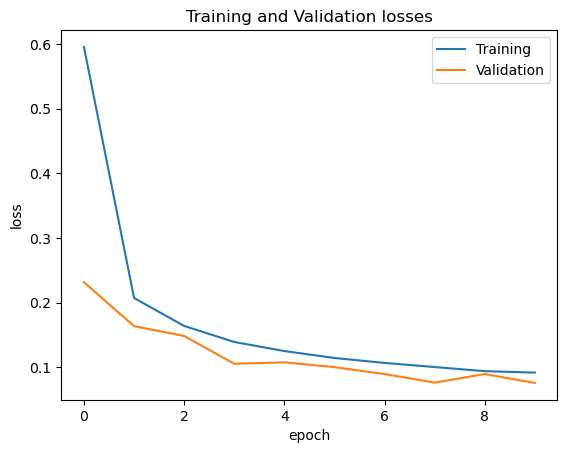

In [18]:
result.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')


In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',1 -  score[0])
print('Test accuracy:', score[1])

Test loss: 0.9339623525738716
Test accuracy: 0.9810000061988831


In [20]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)[:5]
label = np.argmax(y_test,axis=1)[:5]
print(pred)
print(label)

313/313 [==============================] - 2s 7ms/step
[7 2 1 0 4]
[7 2 1 0 4]


In [25]:
%pip install pydot
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Note: you may need to restart the kernel to use updated packages.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
